# <font color = 'yellow'><b>Linear Regression</b></font>

#### Linear Regression is the task of predicting the dependent variable based on the given independent variable/s, the dependent and independent variable/s should have linear relationship

<!-- 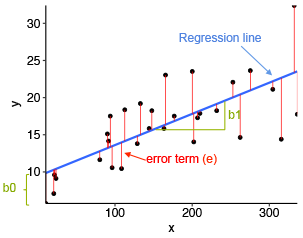 -->

<img src="linear-regression.png" alt="Image" width="500" height="400">


## <font color = 'yellow'><b>Simple Linear Regression:</b></font>

##### it is a method to predict the dependent variable (y) based on the independent variable (x). It is assumed that the two variables are linearly related. Hence, we  try to find the linear function that predicts the response value (y) as accurately as possible as a function of the feature or independent variable (x).

##### y = b0 + b1*x 
##### where y is the dependent variable we are trying to predict, x is the independent variable we are using to make predictions, b0 is the y-intercept, and b1 is the slope of the line.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Creating random number generator
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 4 + rng.randn(50)

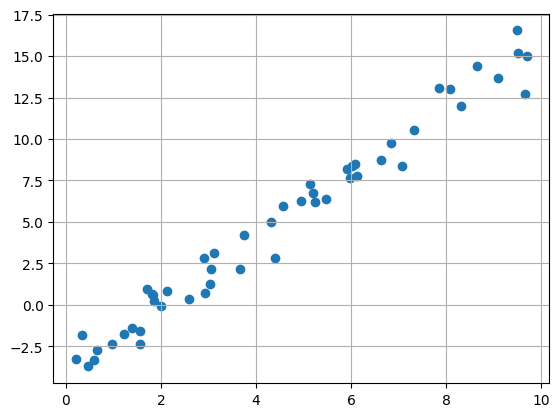

In [36]:
plt.scatter(x, y)
plt.grid(True)

In [37]:
# Importing the linear regression model
from sklearn.linear_model import LinearRegression

In [38]:
X = x[:, np.newaxis]

In [39]:
lr = LinearRegression(fit_intercept=True)

In [40]:
lr.fit(X, y)

LinearRegression()

In [41]:
xfit = np.linspace(0, 10, 1000)
Xfit = xfit[:, np.newaxis]
yfit = lr.predict(Xfit)

In [42]:
# yfit

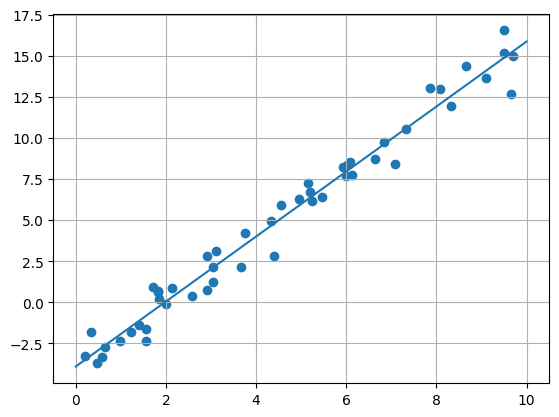

In [43]:
plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.grid(True)

In [44]:
print("Model slope: ", lr.coef_[0])
print("Model intercept: ", lr.intercept_)

Model slope:  1.9776566003853098
Model intercept:  -3.903310725531111


---

# <font color = 'sky-blue'><b>Linear Regression from Scratch</b></font>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax

In [46]:
df = pd.read_csv('Datasets\data_for_lr.csv')

In [47]:
df.sample(5)

,x,y
684,65.0,62.166753
696,93.0,94.625094
54,14.0,17.706776
104,32.0,31.156646
619,11.0,8.359367


In [48]:
df.shape

(700, 2)

In [49]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [51]:
df.dropna(inplace=True)

In [52]:
# Spliting the data into features and target

Xtrain = np.array(df['x'][0:500]).reshape(500, 1)
ytrain = np.array(df['y'][0:500]).reshape(500, 1)
Xtest = np.array(df['x'][500:]).reshape(199, 1)
ytest = np.array(df['y'][500:]).reshape(199, 1)

In [53]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((500, 1), (500, 1), (199, 1), (199, 1))

### Forward propogation

In [54]:
def forward_propogation(train_in, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m, train_in) + c
    return predictions

### Cost Function 

In [55]:
# summation(1/n * (y - f(x))^2) 

def cost_func(predictions, train_out):
    cost = np.mean((train_out - predictions) ** 2)
    
    return cost
    

### Gradient Descent for Back Propogation

In [56]:
# df = (f(x) - y)/n
# dm = df*X
# dc = df

In [57]:
def backward_propogation(train_in, train_out, predictions):
    derivatives = dict()
    df = predictions - train_out
    dm = np.mean(np.multiply(df, train_in))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

### Updated parameters

m = m - (learning_rate * dm) 

c = c - (learning_rate * dc) 

In [58]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']
    return parameters

# <font color = 'light-brown'><b>Model Training</b></font>

In [59]:
def train(train_in, train_out, learning_rate, iters):
    
    # Random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1)
    parameters['c'] = np.random.uniform(0, 1)
    
    plt.figure()
    # loss 
    loss = list()
    
    
    
    # iteration
    for i in range(iters):
        predictions = forward_propogation(train_in, parameters)
        
        # cost 
        cost = cost_func(predictions, train_out)
        loss.append(cost)
        print(f"Iteration: {i + 1}, Loss : {cost}")
        
        # plot
        fig, ax = plt.subplots()
        
        ax.plot(train_in, train_out, "*", label = "Original")
        ax.plot(train_in, predictions, "+", label = "Training")
        
        legend = ax.legend()
        
        # plt.plot(train_in, train_out, "+", label = "Original")
        # plt.plot(train_in, predictions, "+", label = "Training")
        plt.show()
        
        # back propogation
        derivatives = backward_propogation(train_in, train_out, predictions)
        
        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration: 1, Loss : 1274.5459866339402


<Figure size 640x480 with 0 Axes>

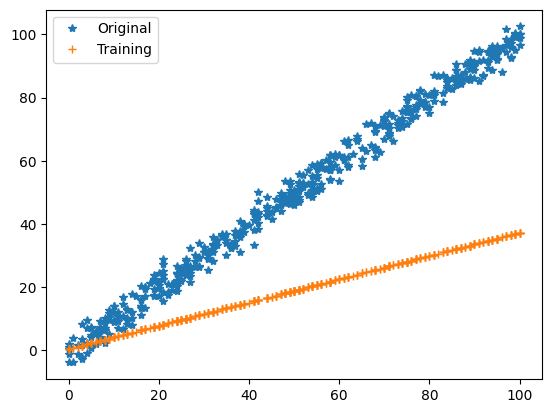

Iteration: 2, Loss : 582.5955626092477


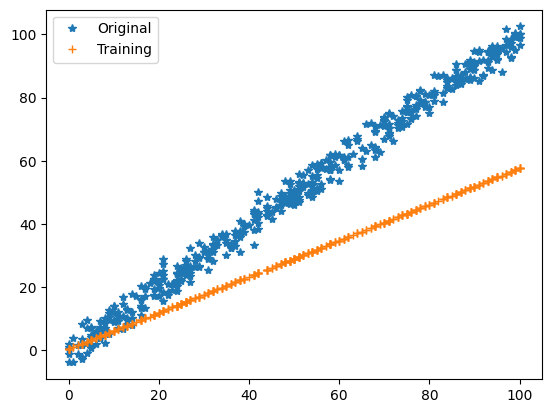

Iteration: 3, Loss : 268.6568857646822


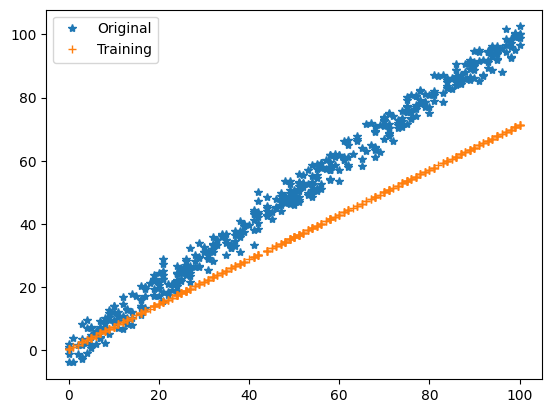

Iteration: 4, Loss : 126.22255731728404


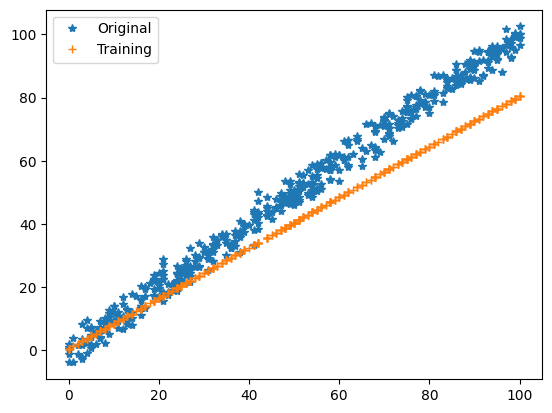

Iteration: 5, Loss : 61.59994170311766


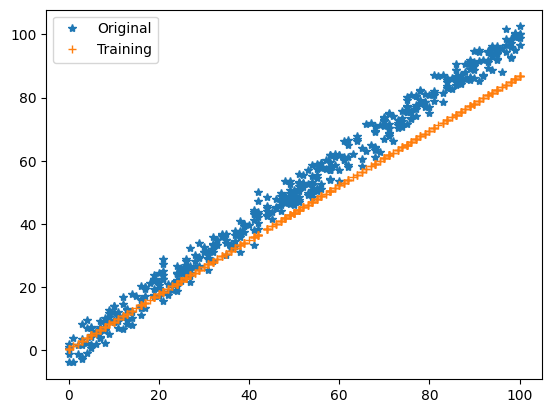

Iteration: 6, Loss : 32.28058638900148


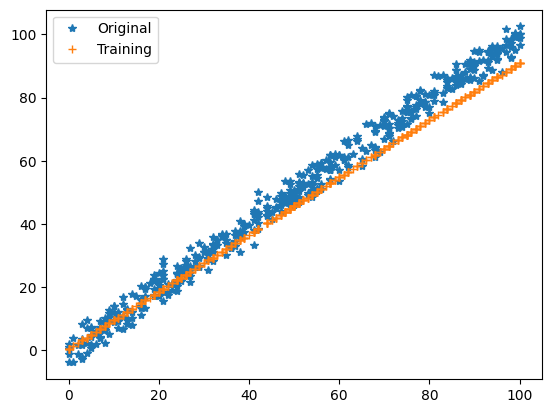

Iteration: 7, Loss : 18.978359376516934


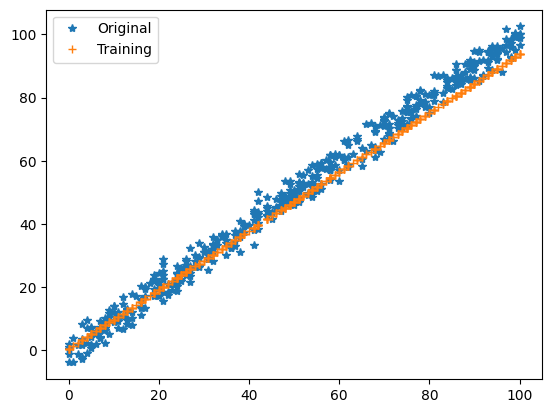

Iteration: 8, Loss : 12.94312121586675


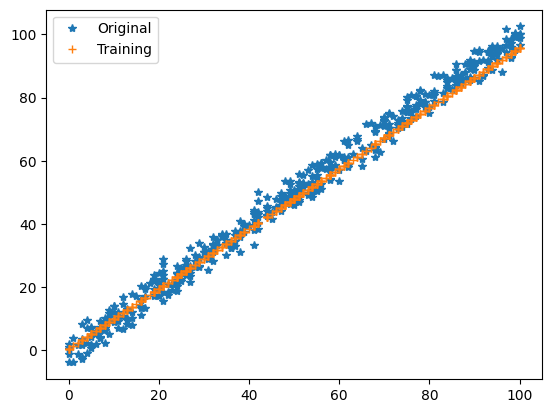

Iteration: 9, Loss : 10.204923946662834


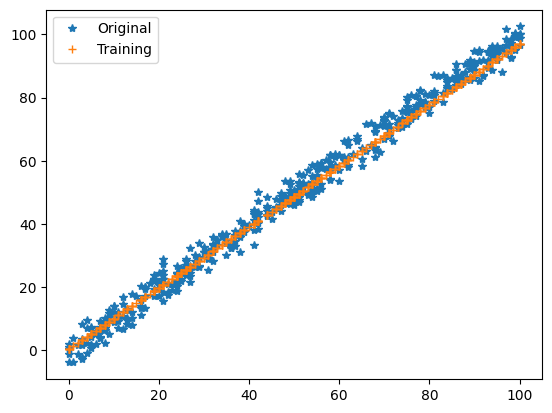

Iteration: 10, Loss : 8.962597781999152


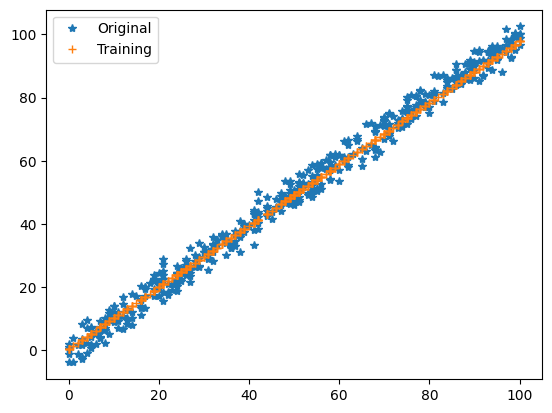

Iteration: 11, Loss : 8.398949994506518


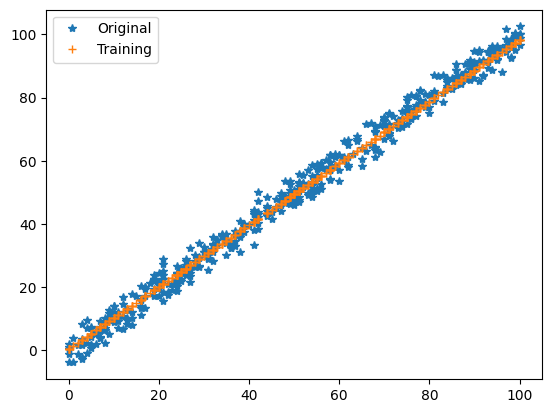

Iteration: 12, Loss : 8.143219338621192


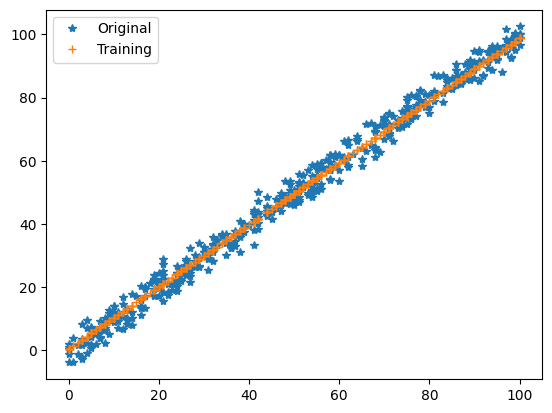

Iteration: 13, Loss : 8.027191026560464


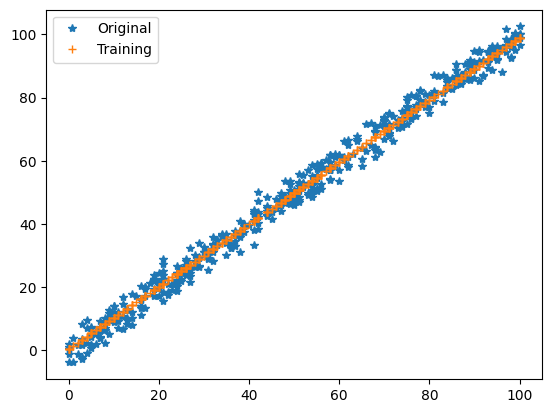

Iteration: 14, Loss : 7.974545822785665


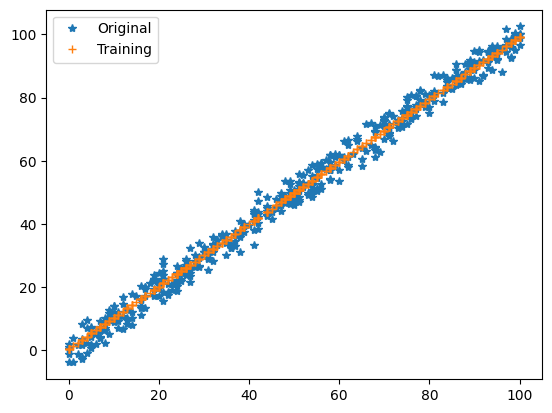

Iteration: 15, Loss : 7.950657605598577


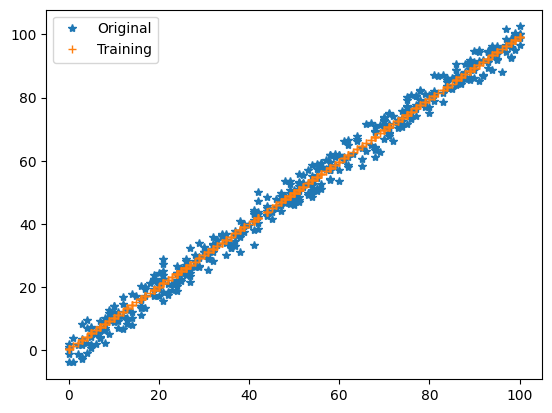

Iteration: 16, Loss : 7.939816465231381


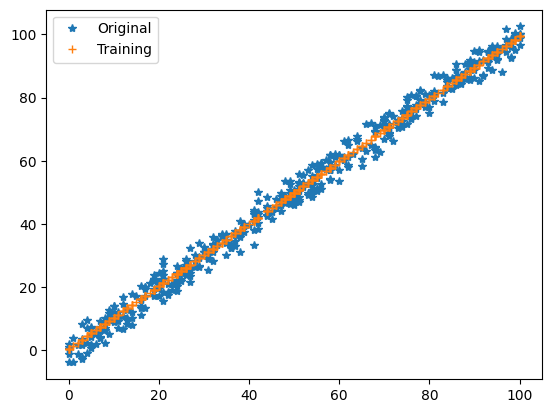

Iteration: 17, Loss : 7.934894798221466


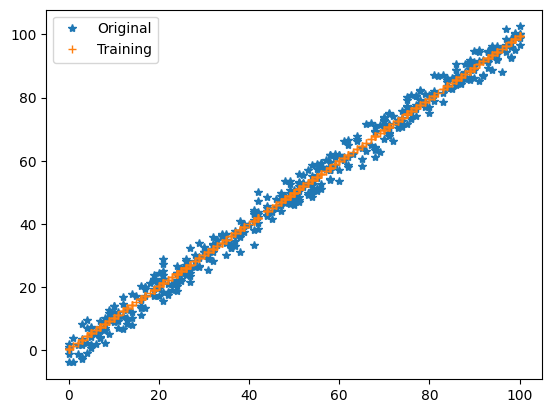

Iteration: 18, Loss : 7.932658802983017


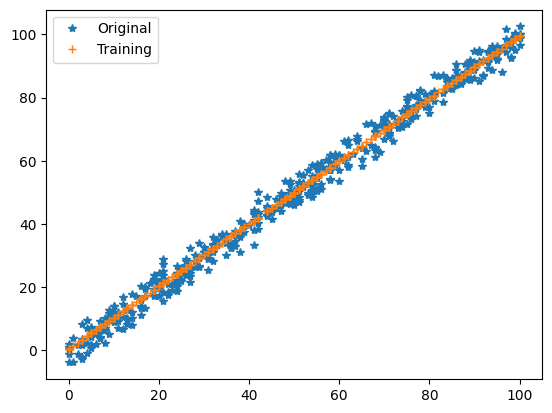

Iteration: 19, Loss : 7.931641300154648


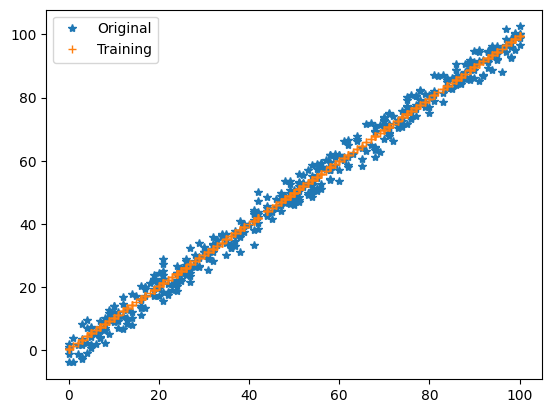

Iteration: 20, Loss : 7.93117662883498


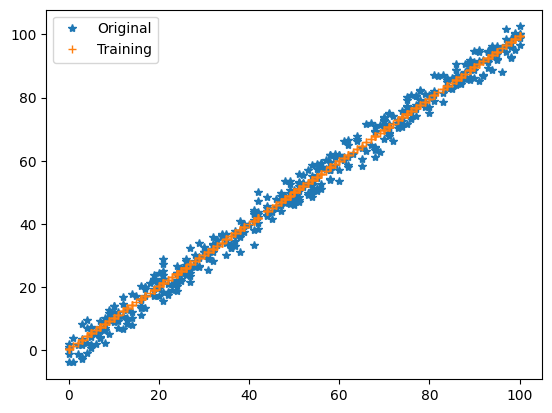

In [60]:
parameters, loss = train(Xtrain, ytrain, 0.0001, 20 )

In [61]:
parameters

{'m': 0.9907608783950117, 'c': 0.42495215598746805}

# Test prediction

Iteration: 1, Loss : 1151.1000639662257


<Figure size 640x480 with 0 Axes>

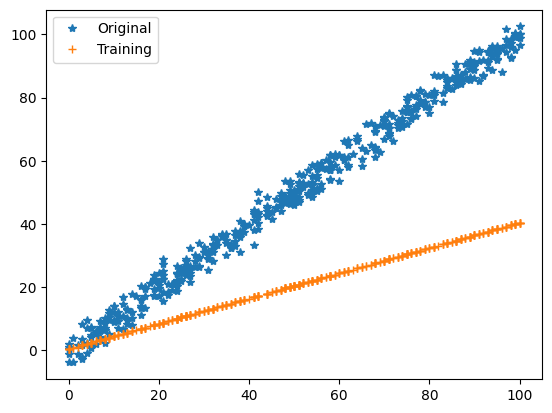

Iteration: 2, Loss : 526.5873121633057


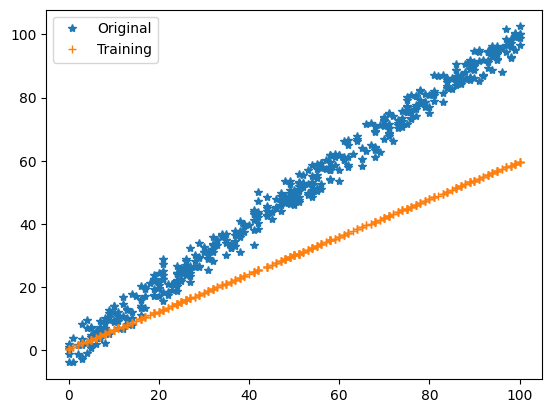

Iteration: 3, Loss : 243.24518193769433


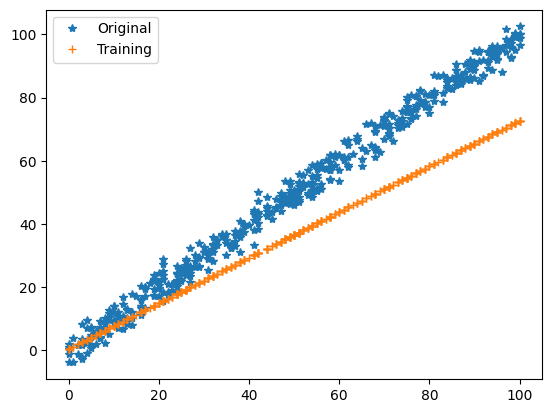

Iteration: 4, Loss : 114.69254061650048


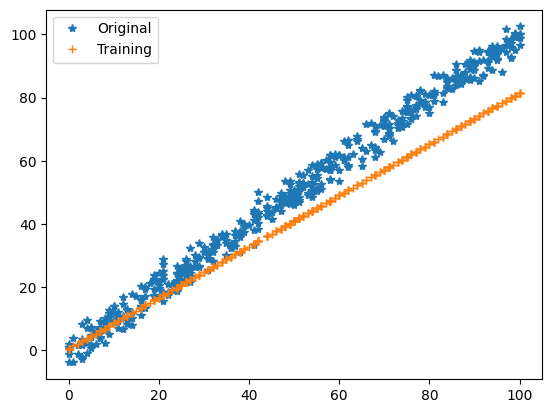

Iteration: 5, Loss : 56.368061862608926


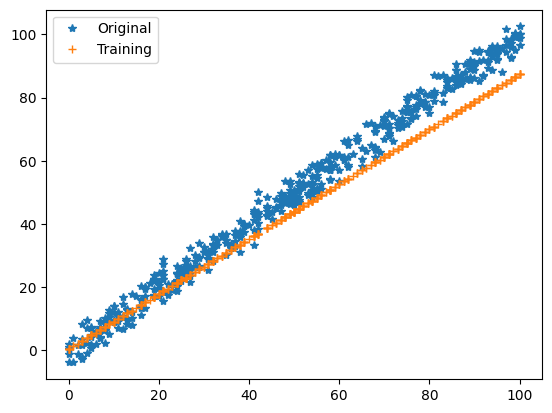

Iteration: 6, Loss : 29.906178253260894


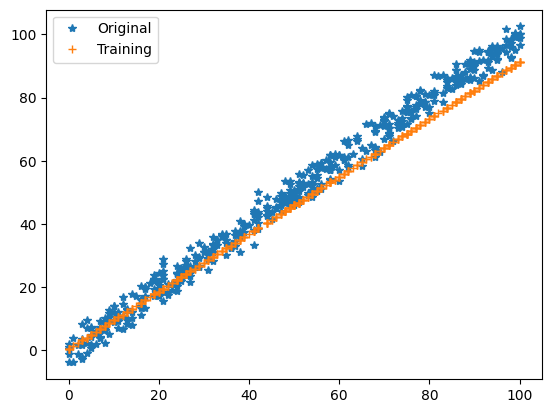

Iteration: 7, Loss : 17.900389353466576


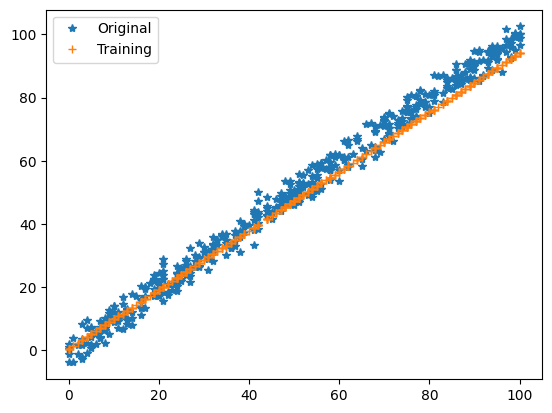

Iteration: 8, Loss : 12.453346635714082


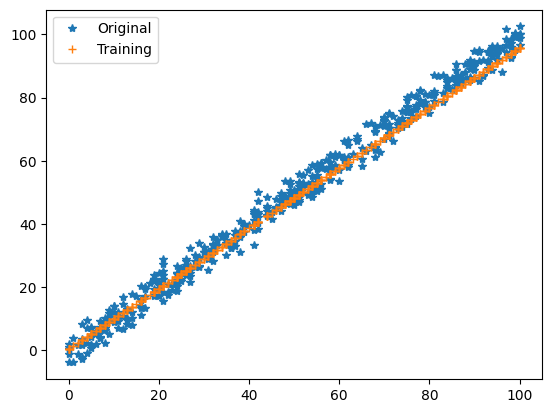

Iteration: 9, Loss : 9.982014325642423


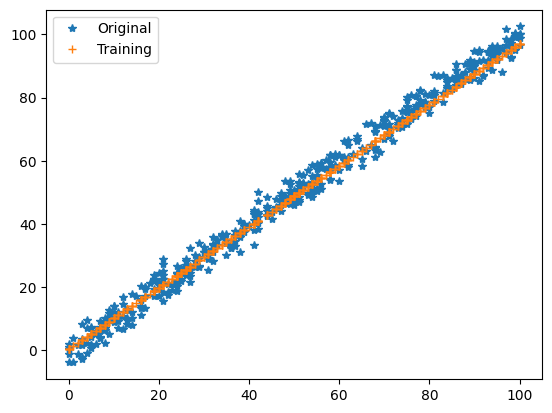

Iteration: 10, Loss : 8.860765123705926


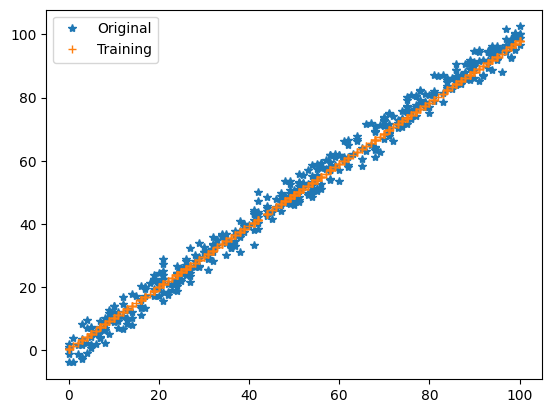

Iteration: 11, Loss : 8.352050123488981


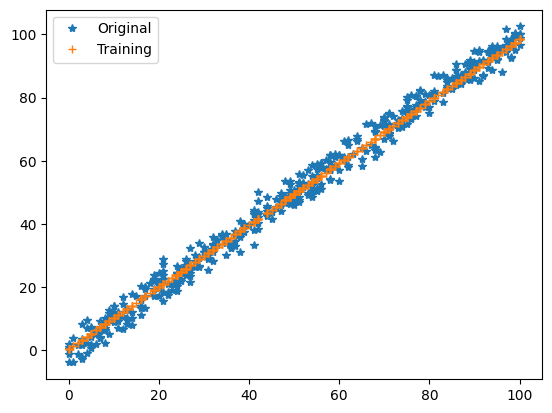

Iteration: 12, Loss : 8.121242569211192


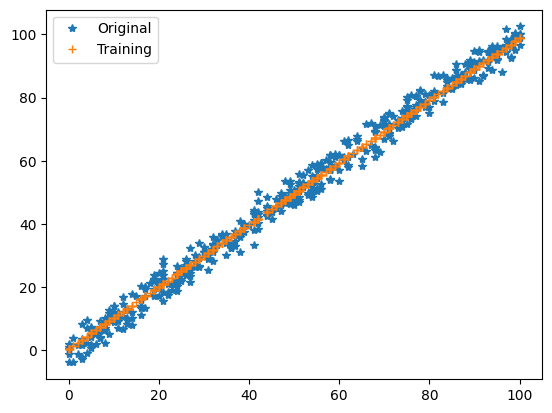

Iteration: 13, Loss : 8.016521931128622


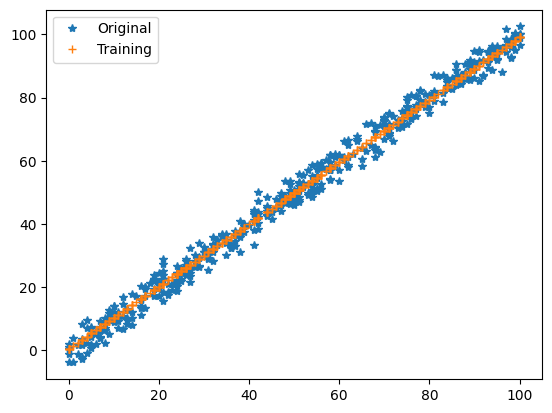

Iteration: 14, Loss : 7.969007066733756


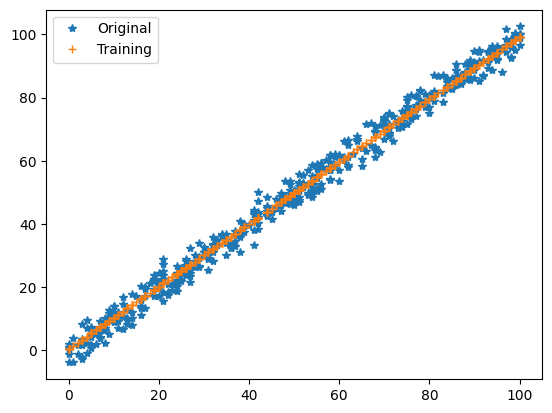

Iteration: 15, Loss : 7.9474465253753355


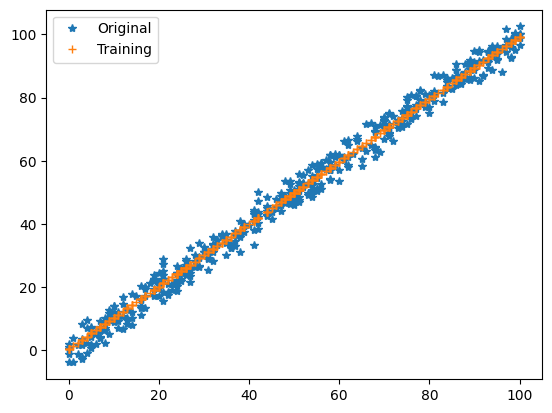

Iteration: 16, Loss : 7.9376614892774855


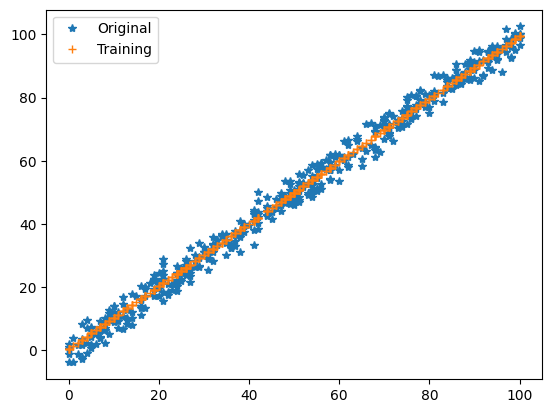

Iteration: 17, Loss : 7.933219013110239


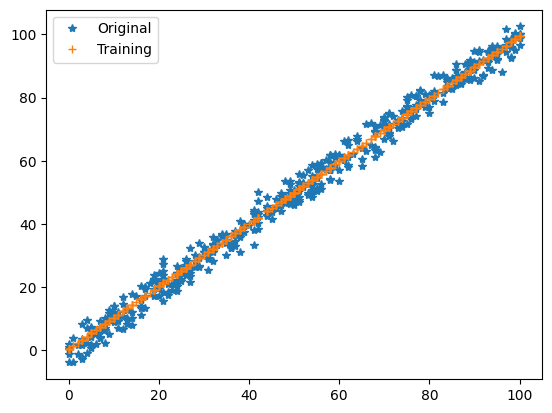

Iteration: 18, Loss : 7.9312004624519865


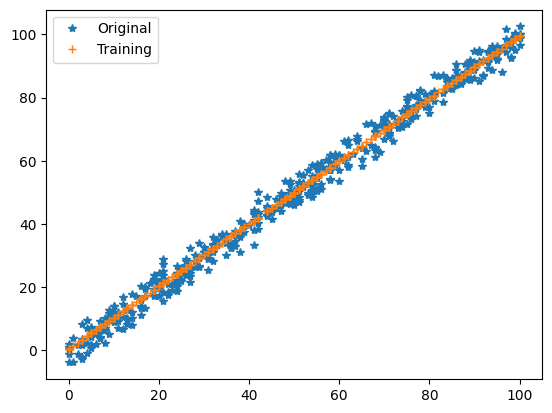

Iteration: 19, Loss : 7.93028164963284


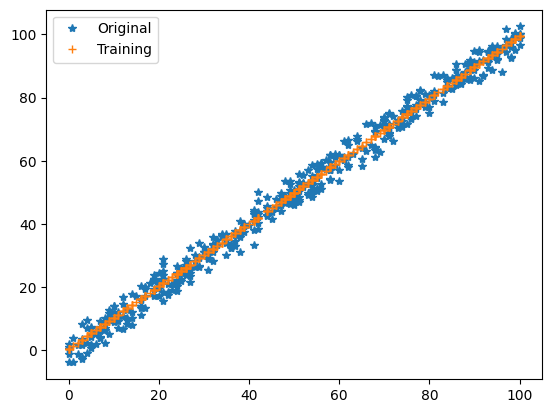

Iteration: 20, Loss : 7.929861789240236


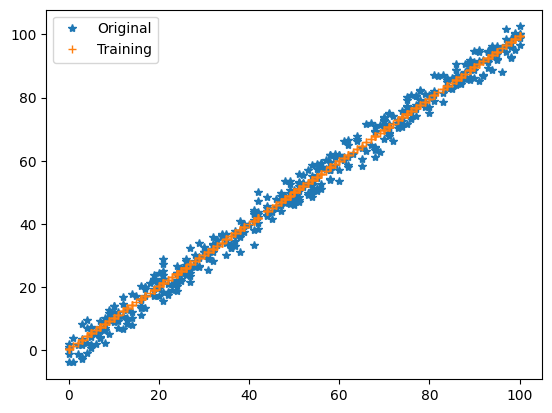

In [62]:
parameters, loss = train(Xtrain, ytrain, 0.0001, 20 )

In [63]:
test_predictions = Xtest * parameters['m'] + parameters['c']

In [64]:
test_predictions

array([[ 5.37525814],
       [60.86177381],
       [46.99014489],
       [97.52250738],
       [30.14602407],
       [62.84343509],
       [ 0.42110495],
       [99.50416866],
       [18.25605642],
       [30.14602407],
       [97.52250738],
       [16.27439515],
       [22.21937897],
       [54.91678999],
       [43.02682235],
       [74.73340273],
       [90.58669292],
       [45.99931426],
       [84.6417091 ],
       [54.91678999],
       [36.09100789],
       [48.97180617],
       [93.55918483],
       [43.02682235],
       [22.21937897],
       [37.08183852],
       [24.20104024],
       [94.55001547],
       [60.86177381],
       [74.73340273],
       [67.79758827],
       [57.8892819 ],
       [ 5.37525814],
       [52.93512872],
       [79.68755592],
       [82.66004783],
       [25.19187088],
       [34.10934661],
       [26.18270152],
       [89.59586229],
       [59.87094318],
       [48.97180617],
       [19.24688706],
       [91.57752356],
       [29.15519343],
       [ 8

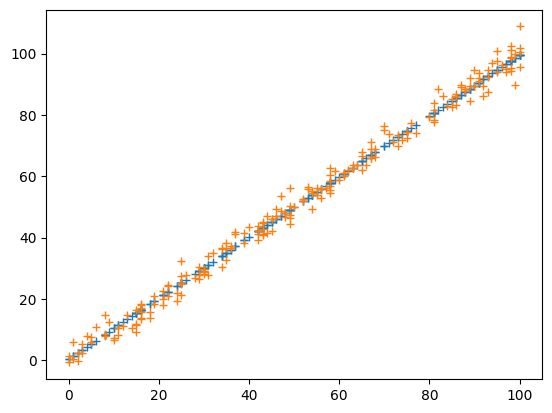

In [65]:
plt.plot(Xtest, test_predictions, "+")
plt.plot(Xtest, ytest, "+")
plt.show()

In [66]:
cost_func(Xtest, test_predictions)

0.07592755464998431

# <font color = 'skyblue'><b>Linear Regression by Batch Gradient Descent</b></font>

In [67]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [72]:
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=12)

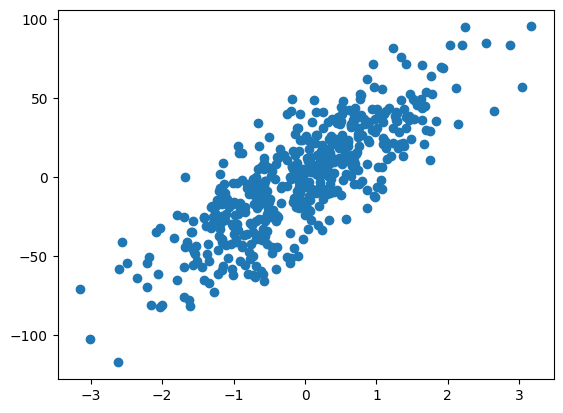

In [73]:
plt.scatter(X, y)

[27.76477273] 0.23124678773547913


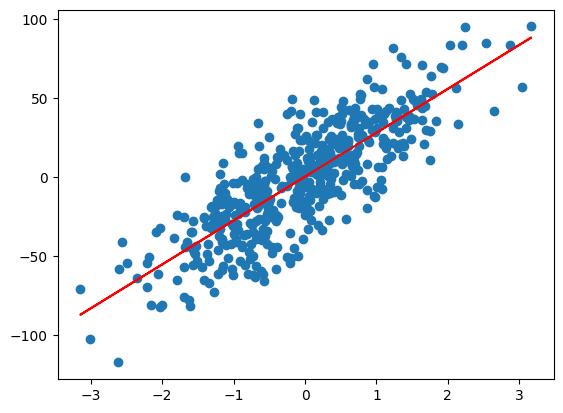

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')

In [75]:
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

0.6471191025482392


In [95]:
class GDRegressor:
    def __init__(self, learning_rate, epochs) -> None:
        self.m = 0
        self.c = 0
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_c = 2 * np.sum(self.m*X.ravel() + self.c - y)
            loss_slope_m = 2 * np.sum((self.m*X.ravel() + self.m - y) * X.ravel())
            
            self.c = self.c - (self.lr*loss_slope_c)
            self.m = self.m - (self.lr*loss_slope_m)
            
        print(self.m, self.c)
        

In [97]:
gd = GDRegressor(0.001, 80)
gd.fit(X, y)

29.661129433457752 0.35540109570242023
